

# CNN example with google Colab.


This notebook is a tutorial for simple CNN with mnist dataset. It introduces how to build Convolutional neural network using Pytorch. 

## References

[1] [Simple Introduction to Convolutional Neural Networks](https://towardsdatascience.com/simple-introduction-to-convolutional-neural-networks-cdf8d3077bac)

##  Main Implementation

The code basically defines 
* Dataset loading, 
* Defining training function, 
* Defining accuracy check function,
* Defining model itself, and
* Training the model. 



In [ ]:
import torch
# assert '.'.join(torch.__version__.split('.')[:2]) == '1.4'
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler

import torchvision.datasets as dset
import torchvision.transforms as T
import os
from torch.autograd import Variable
import torchvision.transforms as transforms
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
USE_GPU = True

dtype = torch.float32 # we will be using float throughout this tutorial

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss
print_every = 100

print('using device:', device)

using device: cpu


We can use torchvision module to use mnist dataset.

In [ ]:
# download mnist dataset from torchvision
root = './data'
if not os.path.exists(root):
    os.mkdir(root)
#predefine the transformed tensor with mean=0.5, stdev = 1.0
transformed = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (1.0,))])
train_set = dset.MNIST(root=root, train=True, transform=transformed, download=True)
test_set = dset.MNIST(root=root, train=False, transform=transformed, download=True)

In [ ]:
#define batchsize as your own
batch = 10

loader_train = torch.utils.data.DataLoader(
                 dataset=train_set,
                 batch_size=batch,
                 shuffle=True)
loader_test = torch.utils.data.DataLoader(
                dataset=test_set,
                batch_size=batch,
                shuffle=False)
print( 'batch number of train dataset: {}'.format(len(loader_train)))
print( 'batch number of test dataset: {}'.format(len(loader_test)))

batch number of train dataset: 6000
batch number of test dataset: 1000


In [ ]:
def train(model, optimizer, epochs=1):
    """
    Train a model on CIFAR-10 using the PyTorch Module API.
    
    Inputs:
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - epochs: (Optional) A Python integer giving the number of epochs to train for
    
    Returns: Nothing, but prints model accuracies during training.
    """
    accuracy_lst = []
    loss_lst = []
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    for e in range(epochs):
        num_correct = 0
        total_loss = 0
        num_samples = 0
        for t, (x, y) in enumerate(loader_train):
            model.train()  # put model to training mode
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)

            scores = model(x)
            loss = F.cross_entropy(scores, y)

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            # This is the backwards pass: compute the gradient of the loss with
            # respect to each  parameter of the model.
            loss.backward()
            _, preds = scores.max(1)
            num_correct += (preds == y).sum()
            # Actually update the parameters of the model using the gradients
            # computed by the backwards pass.
            optimizer.step()
            num_samples +=1

            if t % print_every == 0:
                print('Iteration %d, loss = %.4f' % (t, loss.item()))
                val_acc = check_accuracy(loader_test, model)
                print()
        total_loss /= num_samples
        train_acc = float(num_correct) / num_samples
        print('Train set: Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * train_acc))
        accuracy_lst.append((train_acc, val_acc))
        loss_lst.append((total_loss, val_acc))

        ## plot the data with random image

    return accuracy_lst, loss_lst

In [ ]:
def check_accuracy(loader, model):
    if loader.dataset.train:
        print('Checking accuracy on validation set')
    else:
        print('Checking accuracy on test set')   
    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for t,(x, y) in enumerate(loader):
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            _, preds = scores.max(1)
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)

            # if t == np.random.randint(1000):
            if t == 300:
                print(t,"x",x.size(),"y", y.size())
                fig = plt.figure()
                for i in range(6):
                    plt.subplot(2,3,i+1)
                    plt.tight_layout()
                    plt.imshow(x[i][0], cmap='gray', interpolation='none')
                    plt.title("Prediction: {}".format(scores.max(1, keepdim=True)[1][i].item()))
                
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))
        plt.show()
    return acc

In [ ]:
def flatten(x):
    N = x.shape[0] # read in N, C, H, W
    return x.view(N, -1)  # "flatten" the C * H * W values into a single vector per image

class Flatten(nn.Module):
    def forward(self, x):
        return flatten(x)    



Iteration 0, loss = 2.2177
Checking accuracy on test set
790 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
Got 824 / 10000 correct (8.24)


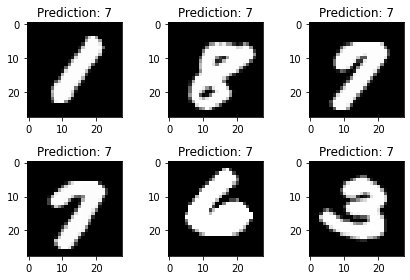


Iteration 1000, loss = 0.2258
Checking accuracy on test set
800 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
Got 9366 / 10000 correct (93.66)


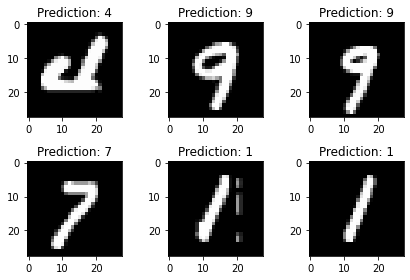


Iteration 2000, loss = 0.0334
Checking accuracy on test set
466 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
Got 9581 / 10000 correct (95.81)


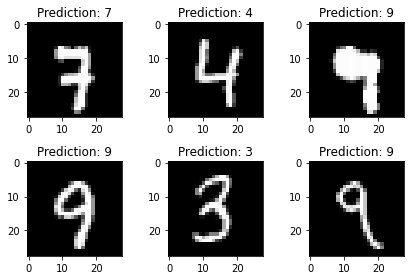


Iteration 3000, loss = 0.1893
Checking accuracy on test set
984 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
Got 9639 / 10000 correct (96.39)


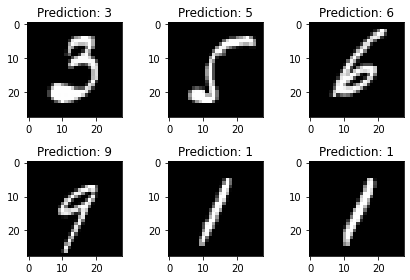


Iteration 4000, loss = 0.0508
Checking accuracy on test set
Got 9703 / 10000 correct (97.03)

Iteration 5000, loss = 0.0059
Checking accuracy on test set
Got 9690 / 10000 correct (96.90)

Train set: Got 56423 / 6000 correct (940.38)
Iteration 0, loss = 0.0496
Checking accuracy on test set
Got 9724 / 10000 correct (97.24)

Iteration 1000, loss = 0.0219
Checking accuracy on test set
944 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
Got 9730 / 10000 correct (97.30)


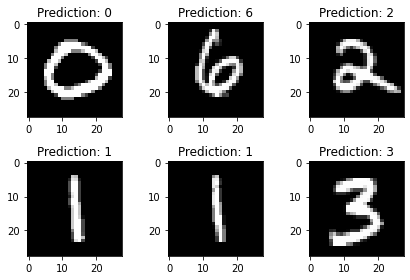


Iteration 2000, loss = 0.0461
Checking accuracy on test set
Got 9714 / 10000 correct (97.14)

Iteration 3000, loss = 0.0048
Checking accuracy on test set
796 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
Got 9706 / 10000 correct (97.06)


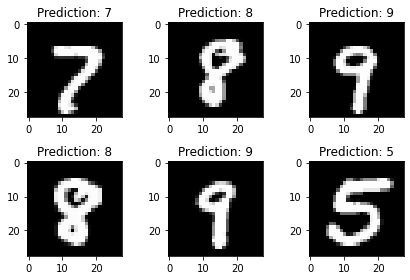


Iteration 4000, loss = 0.0801
Checking accuracy on test set
830 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
Got 9697 / 10000 correct (96.97)


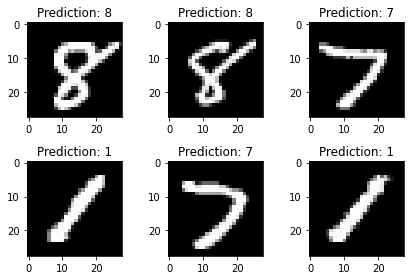


Iteration 5000, loss = 0.1099
Checking accuracy on test set
313 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
813 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
835 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
Got 9764 / 10000 correct (97.64)


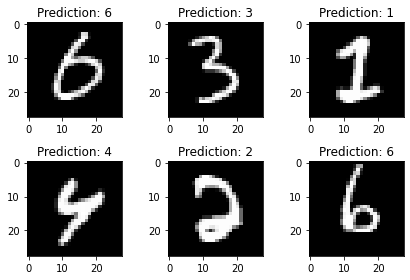

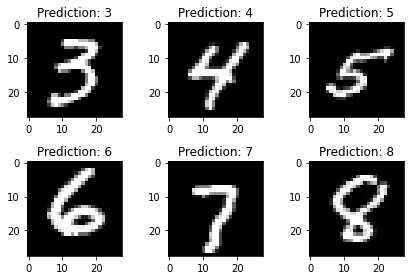

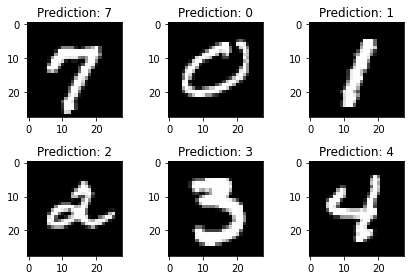


Train set: Got 58229 / 6000 correct (970.48)
Iteration 0, loss = 0.0287
Checking accuracy on test set
267 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
935 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
Got 9734 / 10000 correct (97.34)


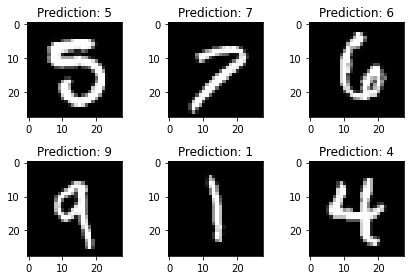

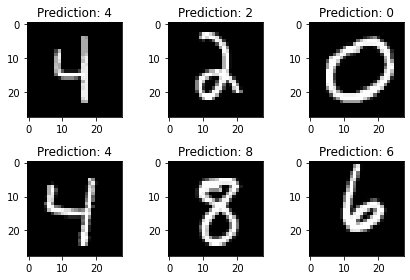


Iteration 1000, loss = 0.0043
Checking accuracy on test set
302 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
919 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
Got 9738 / 10000 correct (97.38)


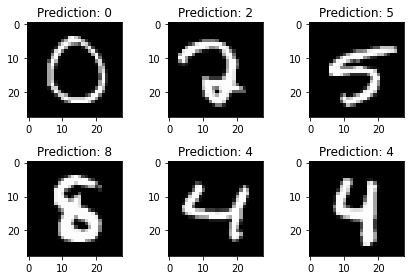

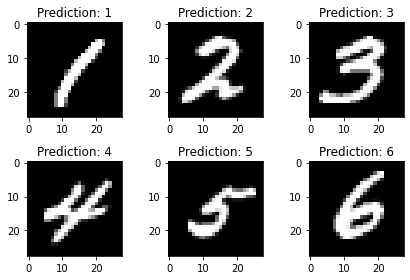


Iteration 2000, loss = 0.0046
Checking accuracy on test set
52 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
559 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
Got 9754 / 10000 correct (97.54)


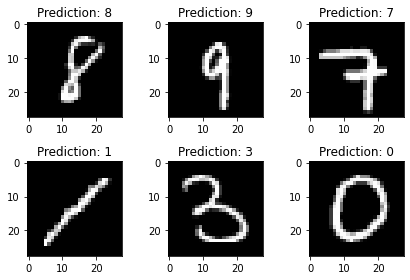

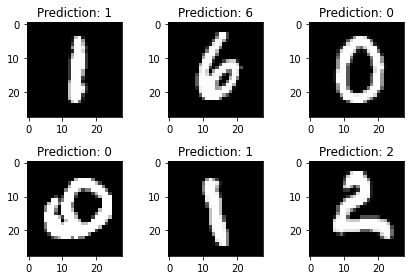


Iteration 3000, loss = 0.0444
Checking accuracy on test set
Got 9732 / 10000 correct (97.32)

Iteration 4000, loss = 0.0045
Checking accuracy on test set
296 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
726 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
Got 9731 / 10000 correct (97.31)


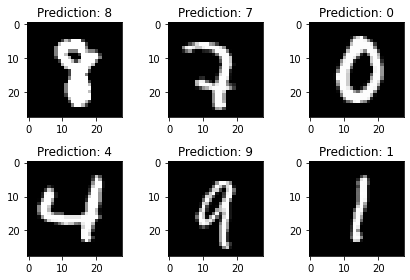

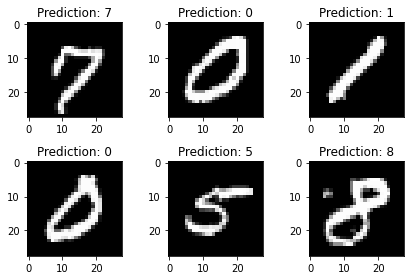


Iteration 5000, loss = 0.0077
Checking accuracy on test set
29 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
Got 9752 / 10000 correct (97.52)


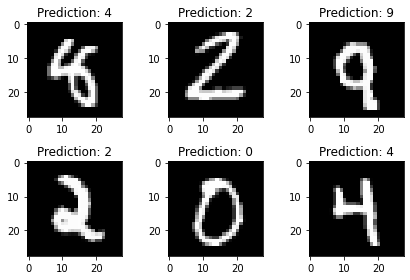


Train set: Got 58496 / 6000 correct (974.93)
Iteration 0, loss = 0.0907
Checking accuracy on test set
238 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
Got 9692 / 10000 correct (96.92)


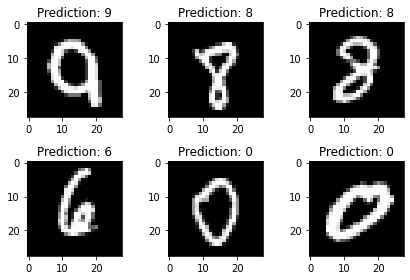


Iteration 1000, loss = 0.0025
Checking accuracy on test set
771 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
Got 9765 / 10000 correct (97.65)


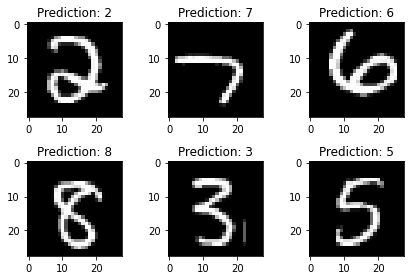


Iteration 2000, loss = 0.0038
Checking accuracy on test set
Got 9753 / 10000 correct (97.53)

Iteration 3000, loss = 0.0137
Checking accuracy on test set
293 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
791 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
Got 9757 / 10000 correct (97.57)


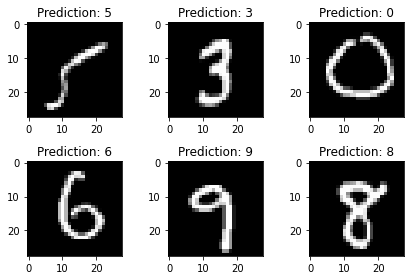

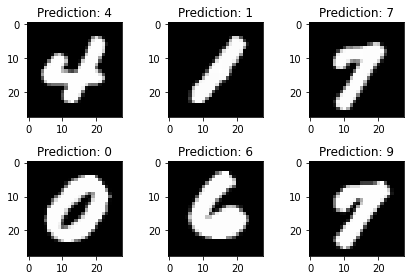


Iteration 4000, loss = 0.0073
Checking accuracy on test set
Got 9699 / 10000 correct (96.99)

Iteration 5000, loss = 0.0048
Checking accuracy on test set
548 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
Got 9775 / 10000 correct (97.75)


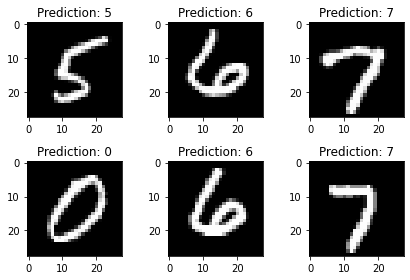


Train set: Got 58595 / 6000 correct (976.58)
Iteration 0, loss = 0.1866
Checking accuracy on test set
198 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
499 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
Got 9769 / 10000 correct (97.69)


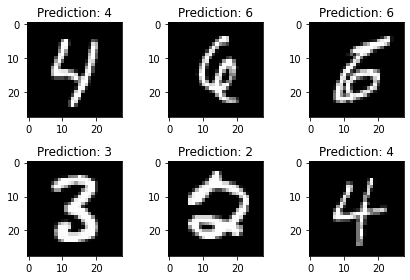

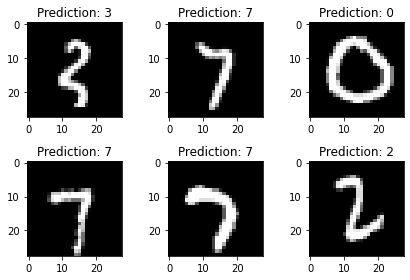


Iteration 1000, loss = 0.0018
Checking accuracy on test set
278 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
991 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
Got 9719 / 10000 correct (97.19)


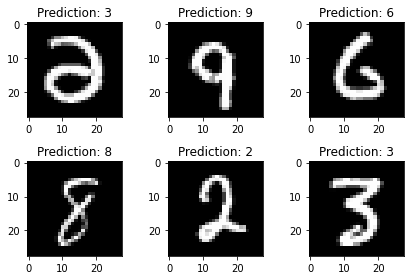

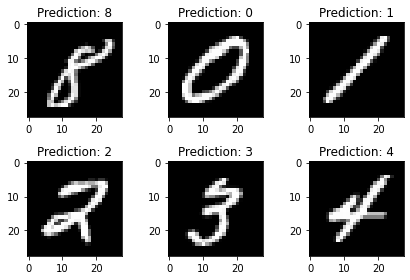


Iteration 2000, loss = 0.0008
Checking accuracy on test set
606 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
672 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
900 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
Got 9782 / 10000 correct (97.82)


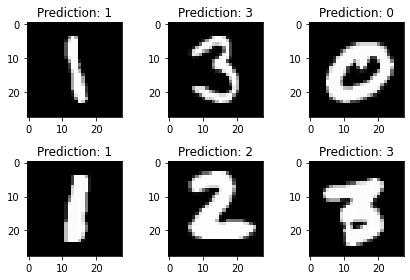

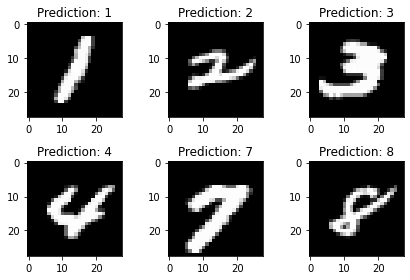

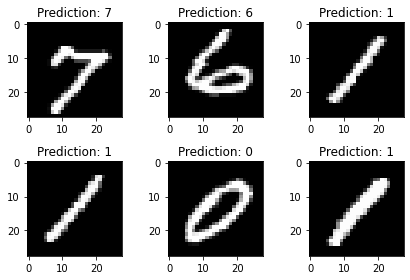


Iteration 3000, loss = 0.0561
Checking accuracy on test set
176 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
341 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
343 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
Got 9765 / 10000 correct (97.65)


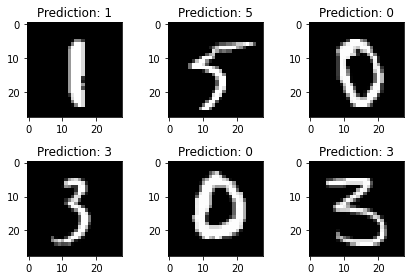

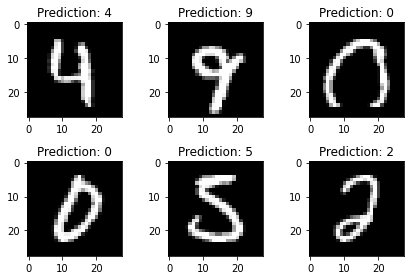

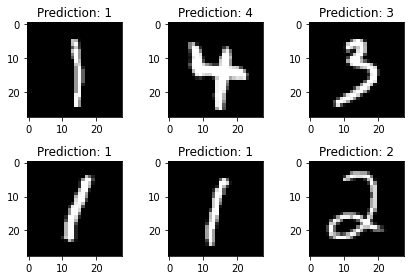


Iteration 4000, loss = 0.0204
Checking accuracy on test set
Got 9731 / 10000 correct (97.31)

Iteration 5000, loss = 0.0449
Checking accuracy on test set
397 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
Got 9788 / 10000 correct (97.88)


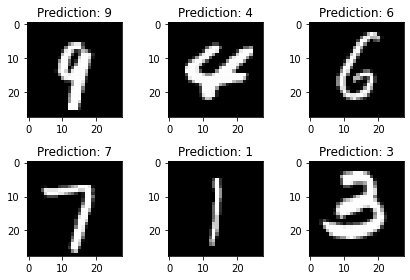


Train set: Got 58689 / 6000 correct (978.15)
Iteration 0, loss = 0.0096
Checking accuracy on test set
20 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
74 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
140 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
415 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
666 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
Got 9728 / 10000 correct (97.28)


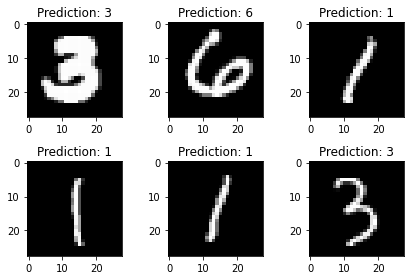

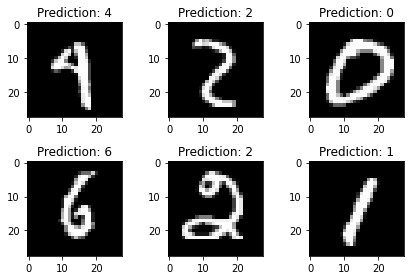

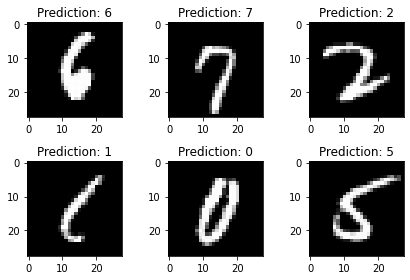

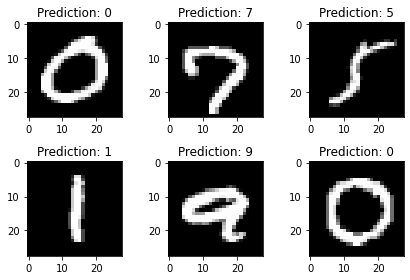

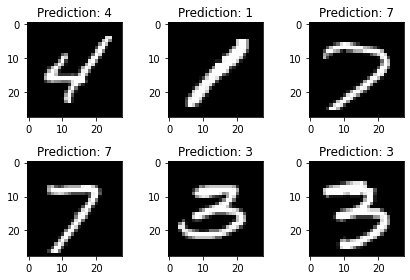


Iteration 1000, loss = 0.0174
Checking accuracy on test set
Got 9755 / 10000 correct (97.55)

Iteration 2000, loss = 0.0013
Checking accuracy on test set
887 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
Got 9776 / 10000 correct (97.76)


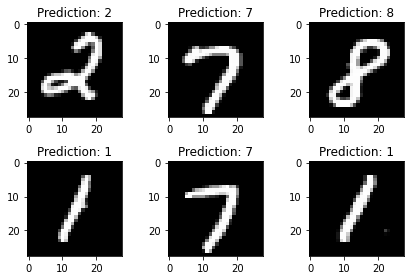


Iteration 3000, loss = 0.0463
Checking accuracy on test set
904 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
Got 9772 / 10000 correct (97.72)


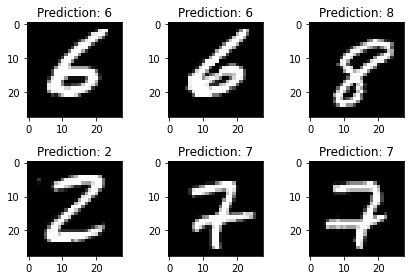


Iteration 4000, loss = 0.0039
Checking accuracy on test set
841 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
995 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
Got 9779 / 10000 correct (97.79)


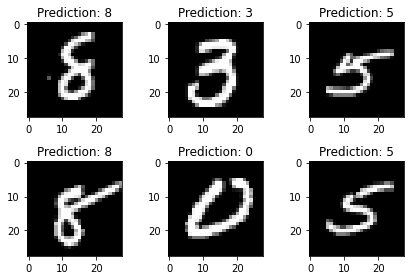

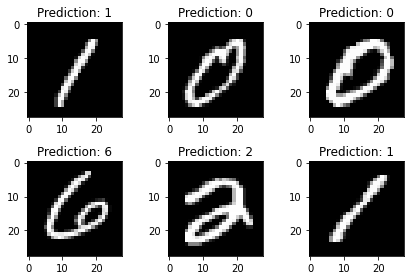


Iteration 5000, loss = 0.0472
Checking accuracy on test set
378 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
794 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
Got 9768 / 10000 correct (97.68)


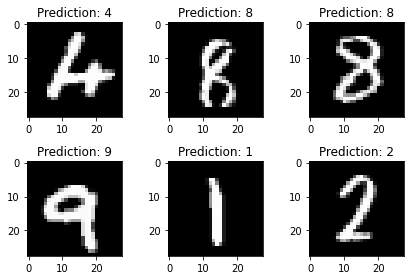

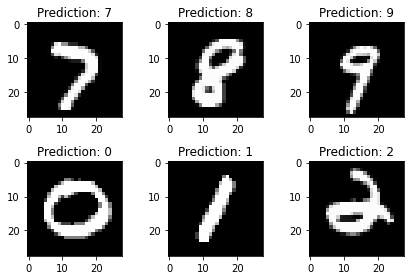


Train set: Got 58750 / 6000 correct (979.17)
Iteration 0, loss = 0.2979
Checking accuracy on test set
414 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
Got 9790 / 10000 correct (97.90)


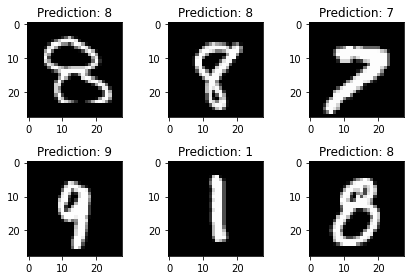


Iteration 1000, loss = 0.1817
Checking accuracy on test set
948 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
Got 9755 / 10000 correct (97.55)


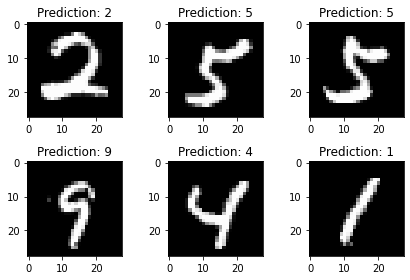


Iteration 2000, loss = 0.4747
Checking accuracy on test set
Got 9752 / 10000 correct (97.52)

Iteration 3000, loss = 0.0053
Checking accuracy on test set
462 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
Got 9752 / 10000 correct (97.52)


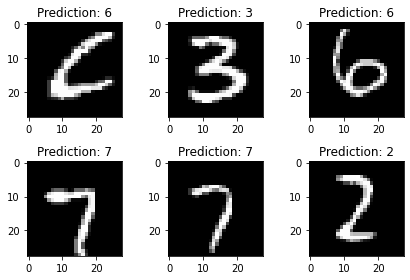


Iteration 4000, loss = 0.0083
Checking accuracy on test set
Got 9801 / 10000 correct (98.01)

Iteration 5000, loss = 0.0046
Checking accuracy on test set
534 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
Got 9778 / 10000 correct (97.78)


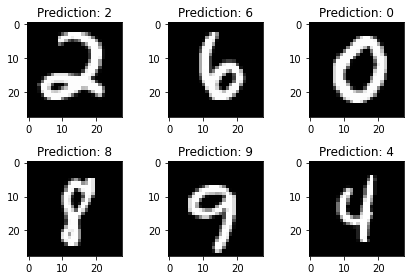


Train set: Got 58778 / 6000 correct (979.63)
Iteration 0, loss = 0.0026
Checking accuracy on test set
162 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
496 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
Got 9788 / 10000 correct (97.88)


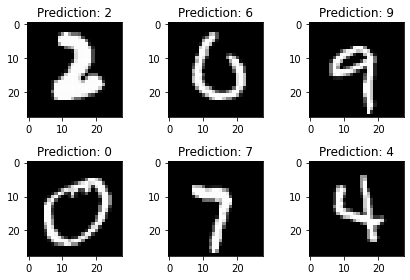

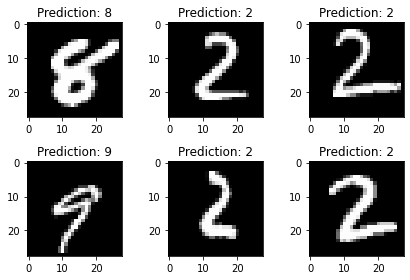


Iteration 1000, loss = 0.4532
Checking accuracy on test set
Got 9773 / 10000 correct (97.73)

Iteration 2000, loss = 0.0020
Checking accuracy on test set
Got 9761 / 10000 correct (97.61)

Iteration 3000, loss = 0.0953
Checking accuracy on test set
843 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
Got 9786 / 10000 correct (97.86)


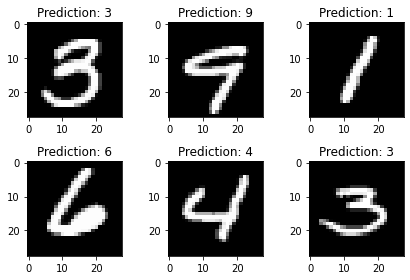


Iteration 4000, loss = 0.0091
Checking accuracy on test set
Got 9781 / 10000 correct (97.81)

Iteration 5000, loss = 0.0369
Checking accuracy on test set
674 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
Got 9785 / 10000 correct (97.85)


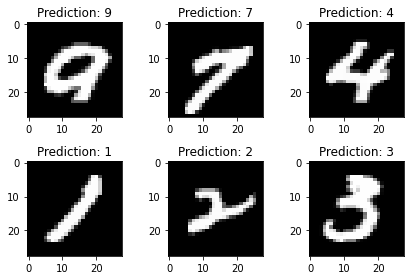


Train set: Got 58823 / 6000 correct (980.38)
Iteration 0, loss = 0.0168
Checking accuracy on test set
Got 9777 / 10000 correct (97.77)

Iteration 1000, loss = 0.0005
Checking accuracy on test set
Got 9778 / 10000 correct (97.78)

Iteration 2000, loss = 0.1697
Checking accuracy on test set
Got 9793 / 10000 correct (97.93)

Iteration 3000, loss = 0.0025
Checking accuracy on test set
Got 9752 / 10000 correct (97.52)

Iteration 4000, loss = 0.0928
Checking accuracy on test set
130 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
758 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
Got 9768 / 10000 correct (97.68)


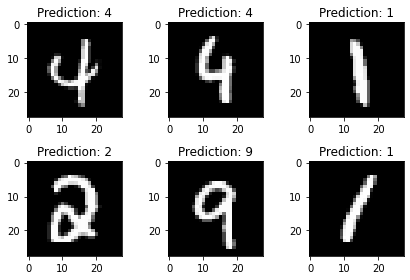

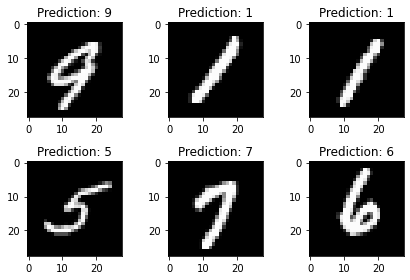


Iteration 5000, loss = 0.0010
Checking accuracy on test set
Got 9783 / 10000 correct (97.83)

Train set: Got 58869 / 6000 correct (981.15)
Iteration 0, loss = 0.0057
Checking accuracy on test set
184 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
Got 9782 / 10000 correct (97.82)


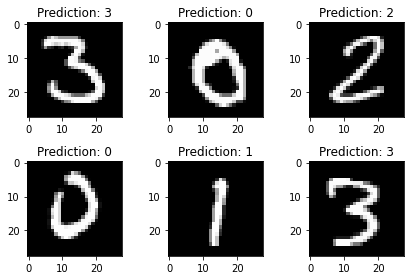


Iteration 1000, loss = 0.0013
Checking accuracy on test set
565 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
907 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
Got 9799 / 10000 correct (97.99)


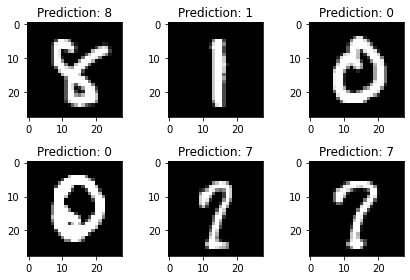

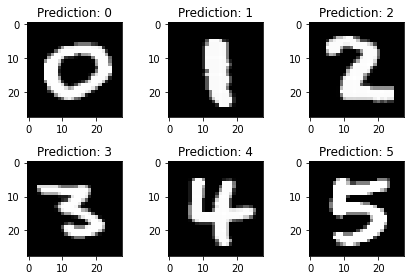


Iteration 2000, loss = 0.0022
Checking accuracy on test set
433 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
Got 9779 / 10000 correct (97.79)


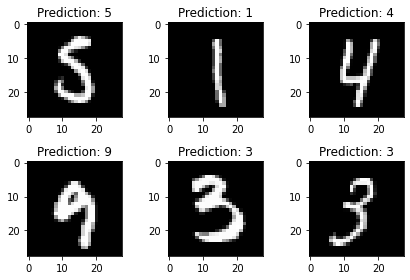


Iteration 3000, loss = 0.0031
Checking accuracy on test set
609 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
Got 9775 / 10000 correct (97.75)


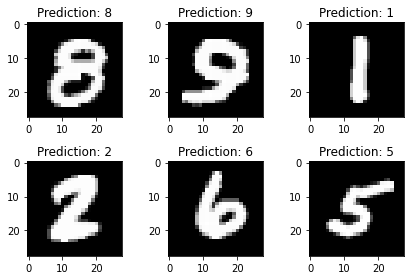


Iteration 4000, loss = 0.0437
Checking accuracy on test set
173 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
385 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
838 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
Got 9743 / 10000 correct (97.43)


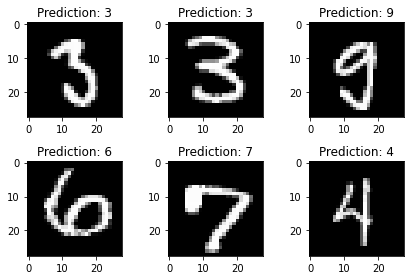

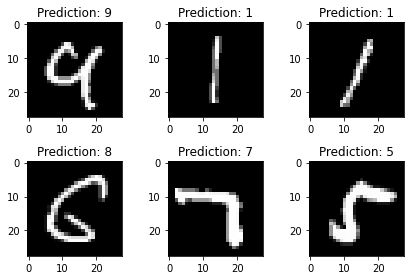

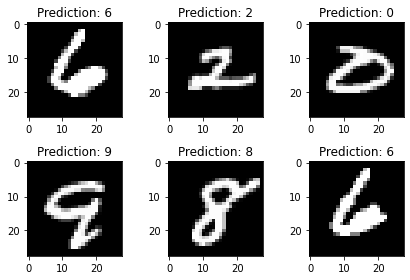


Iteration 5000, loss = 0.0001
Checking accuracy on test set
258 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
795 x torch.Size([10, 1, 28, 28]) y torch.Size([10])
Got 9797 / 10000 correct (97.97)


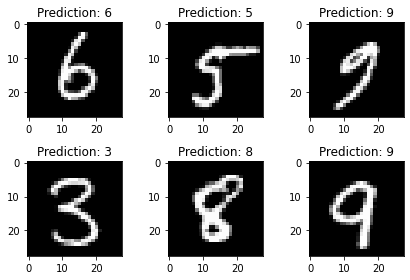

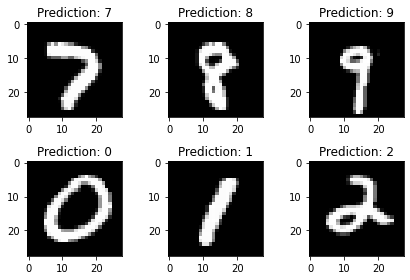


Train set: Got 58892 / 6000 correct (981.53)


([(9.403833333333333, 0.969),
  (9.704833333333333, 0.9764),
  (9.749333333333333, 0.9752),
  (9.765833333333333, 0.9775),
  (9.7815, 0.9788),
  (9.791666666666666, 0.9768),
  (9.796333333333333, 0.9778),
  (9.803833333333333, 0.9785),
  (9.8115, 0.9783),
  (9.815333333333333, 0.9797)],
 [(0.0, 0.969),
  (0.0, 0.9764),
  (0.0, 0.9752),
  (0.0, 0.9775),
  (0.0, 0.9788),
  (0.0, 0.9768),
  (0.0, 0.9778),
  (0.0, 0.9785),
  (0.0, 0.9783),
  (0.0, 0.9797)])

In [ ]:
model = None
optimizer = None


layer1 = nn.Sequential(
    nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(4),
    nn.ReLU(inplace=True),
    nn.MaxPool2d(kernel_size=2, stride=2),
    # Defining another 2D convolution layer
    nn.Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(4),
    nn.ReLU(inplace=True),
    nn.MaxPool2d(kernel_size=2, stride=2),
)

layer2 = nn.Sequential(
    nn.Conv2d(64,32,kernel_size = 5, padding =2),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.Conv2d(32,16,kernel_size = 5, padding =2),
    nn.ReLU(),
    nn.MaxPool2d(2),
)
layer3 = nn.Sequential(
    nn.Conv2d(16,8,kernel_size = 5, padding =2),
    nn.BatchNorm2d(8),
    nn.ReLU(),
    nn.Conv2d(8,8,kernel_size = 5, padding =2),
    nn.ReLU(),
    nn.MaxPool2d(2),
)

model = nn.Sequential(
    layer1,
    Flatten(),
    nn.Linear(7*7*4,10),
)


learning_rate = 1e-3

optimizer = optim.Adam(model.parameters(), lr = learning_rate)
pass
print_every = 1000

train(model, optimizer, epochs=10)